# Introduction

In this notebook we will go through the competition step by step explaining each step as we go.  
- Understanding the data
- Preprocessing & Feature Engineering
- Model selection and evaluation

Hold on to your hats!

In [37]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/home-data-for-ml-course/train.csv.gz
/kaggle/input/home-data-for-ml-course/sample_submission.csv.gz
/kaggle/input/home-data-for-ml-course/test.csv
/kaggle/input/home-data-for-ml-course/sample_submission.csv
/kaggle/input/home-data-for-ml-course/train.csv
/kaggle/input/home-data-for-ml-course/data_description.txt
/kaggle/input/home-data-for-ml-course/test.csv.gz


## Understanding the data
Before we do anything, let's start by analyzing the data and visualize some of the features.  
> To understand the feature names read the data_description.txt file.  
> We also recommend that you google some of the feature descriptions to get some domain knowledge.

In [38]:
# Important Imports
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib as mpl
import matplotlib.pyplot as plt

# Load the data
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)
train_df = pd.read_csv("/kaggle/input/home-data-for-ml-course/train.csv")
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [39]:
# Now I just want to see how many categorical features I have and how many categories per feature
# I also want to know unique numbers in each numerical features since it could be categorical as well

def display_information(df):
    info = pd.DataFrame(df.dtypes, columns=['dtypes'])
    info = info.reset_index()
    info['Name'] = info['index']
    info = info[['Name', 'dtypes']]
    info['Uniques'] = df.nunique(dropna=False).values
    info['Missing'] = df.isnull().sum().values
    
    return info

display_information(train_df)

,Name,dtypes,Uniques,Missing
0,Id,int64,1460,0
1,MSSubClass,int64,15,0
2,MSZoning,object,5,0
3,LotFrontage,float64,111,259
4,LotArea,int64,1073,0
5,Street,object,2,0
6,Alley,object,3,1369
7,LotShape,object,4,0
8,LandContour,object,4,0
9,Utilities,object,2,0


In [40]:
# Looking at this table you can notice that you have 1460 rows,
# feature Alley has 1369 missing values
# feature PoolQC has 1453 missing values
# feature Fence has 1179 missing values
# feature MiscFeature has 1406 missing values
# these amounts of missing values are too big to be imputed, so we will drop these features

train_df.drop(columns=["Alley", "PoolQC", "Fence", "MiscFeature"], inplace=True)

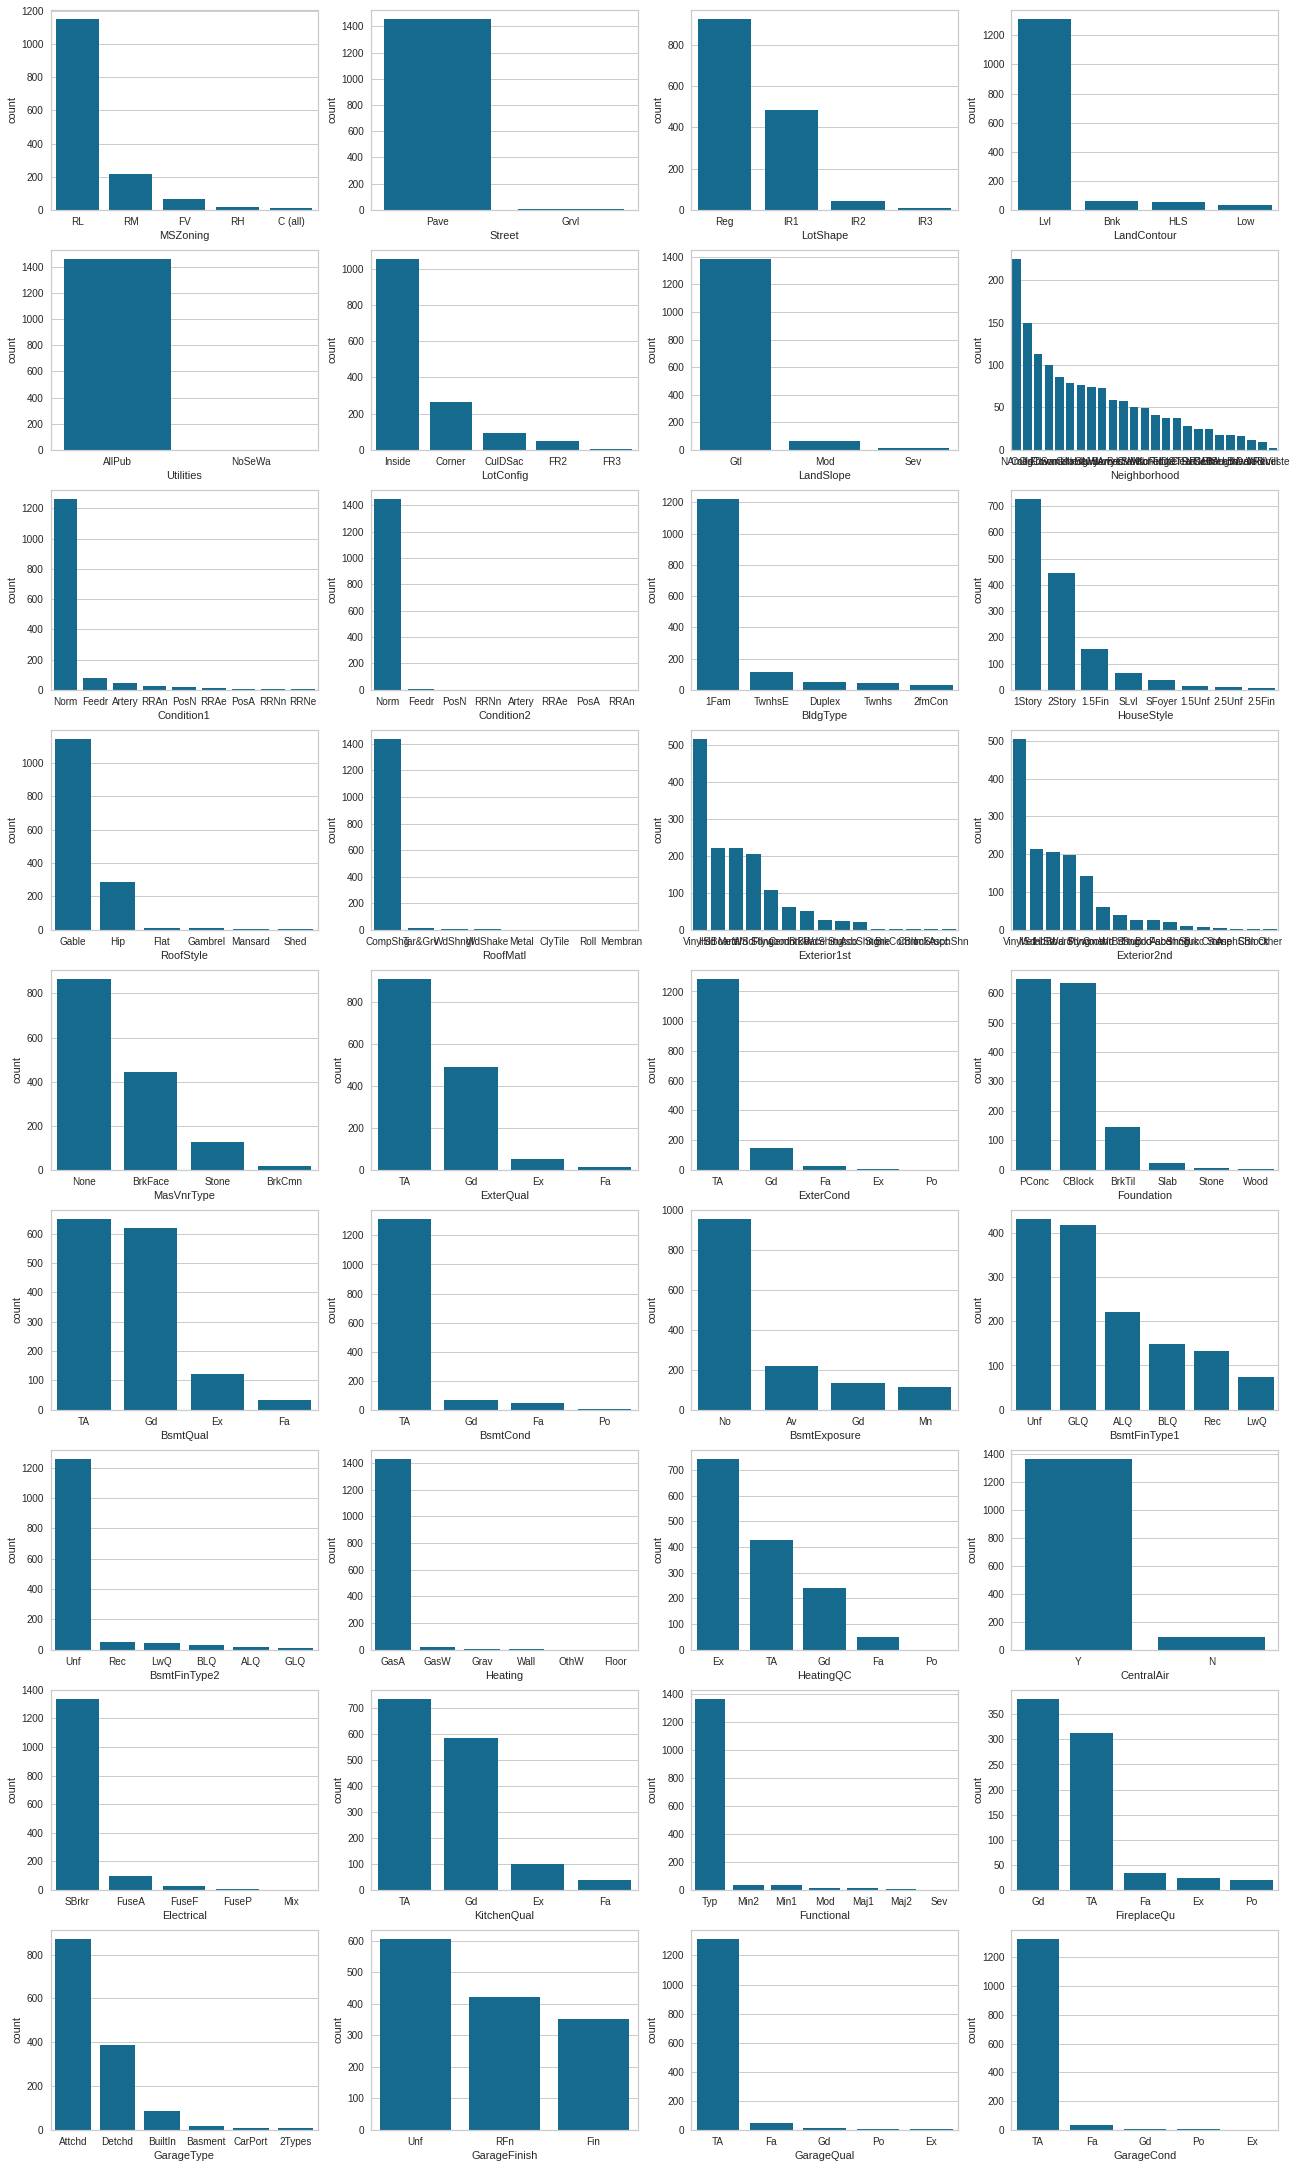

In [41]:
# now let's plot some of the numerical data
def plot_categorical_count(df):
    color = sb.color_palette()[0]
    columns = df.select_dtypes(["object"]).columns
        
    fig, ax = plt.subplots(len(columns) // 4, 4, figsize=(22, len(columns)))
    for col, subplot in zip(columns, ax.flatten()):
        freq = df[col].value_counts()
        sb.countplot(df[col], order=freq.index, ax=subplot, color=color)
plot_categorical_count(train_df)

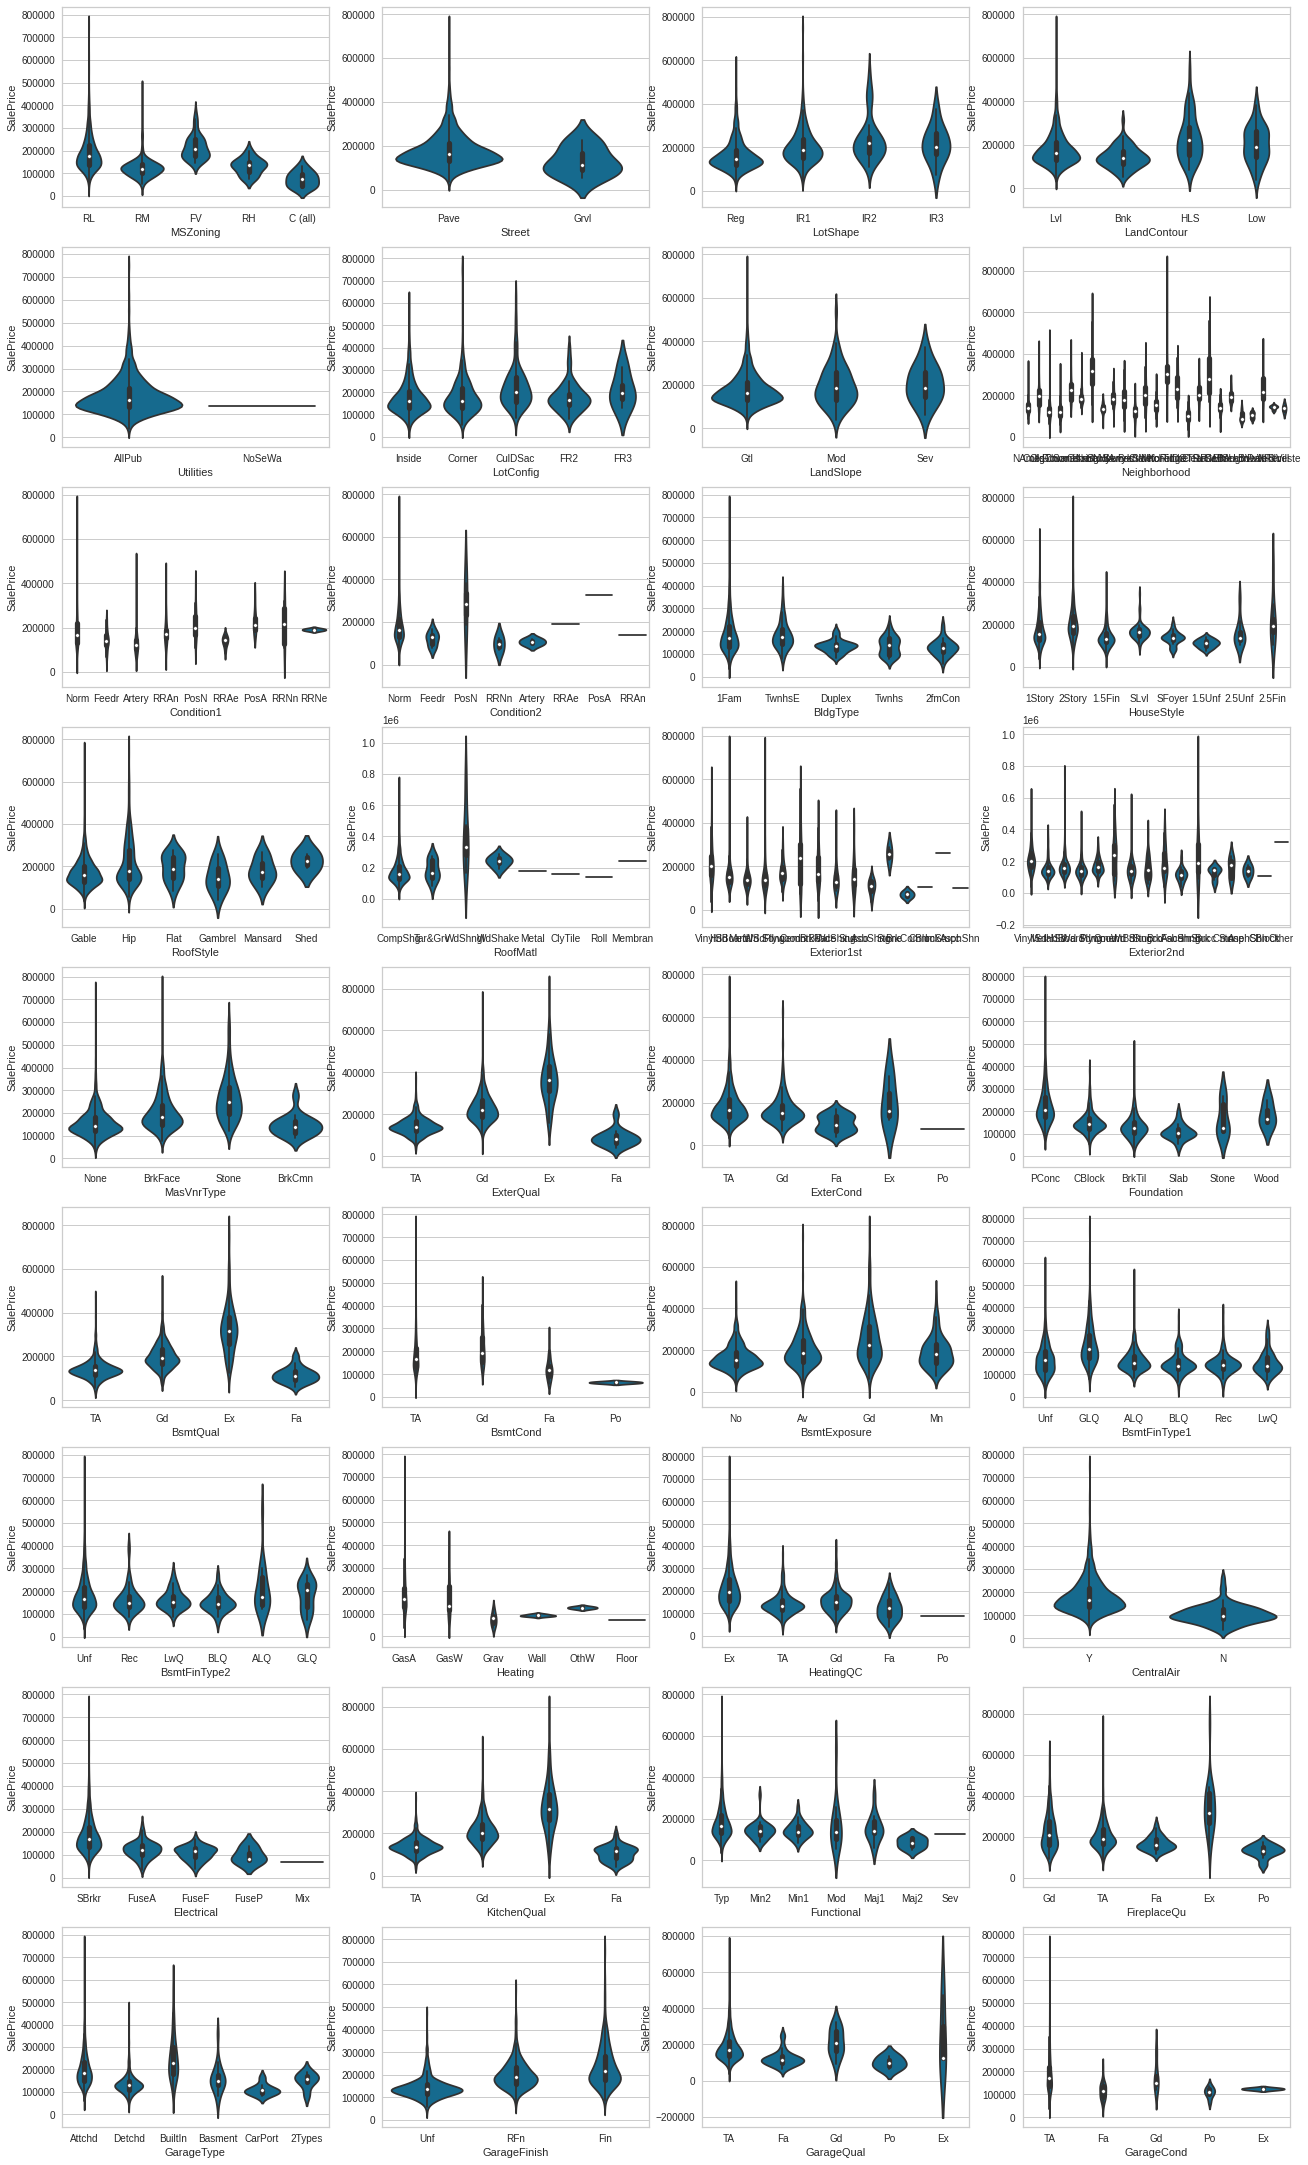

In [42]:
# the following function is going to allow us to somehow see the relation between
# categorical features and the output
def plot_categorical_relation_to_target(df, target):
    color = sb.color_palette()[0]
    columns = df.select_dtypes(["object"]).columns
        
    fig, ax = plt.subplots(len(columns) // 4, 4, figsize=(22, len(columns)))
    for col, subplot in zip(columns, ax.flatten()):
        freq = df[col].value_counts()
        sb.violinplot(data=df, x=col, y=target, order=freq.index, ax=subplot, color=color)
        
plot_categorical_relation_to_target(train_df, "SalePrice")

### What I figured
- By looking at these two figures I can tell that encoding the `Utilities` and `Street` features is useless since most of the data exist in one category and the other category has price that is in the mean of the first category so it seems not to add any value.


In [43]:
train_df.drop(columns=["Utilities", "Street"], inplace=True)

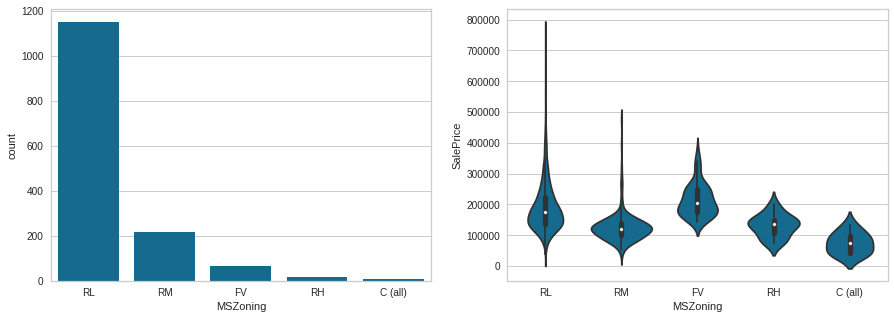

In [44]:
# plot count and violin of feature
# so we can see the frequency of categories in a certain feature and
# see how it relates to the output target
def count_and_violin(df, feature, target):
    color = sb.color_palette()[0]
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    axis = ax.flatten()
    freq = df[feature].value_counts()
    sb.countplot(df[feature], order=freq.index, ax=axis[0], color=color)
    sb.violinplot(data=df, x=feature, y=target, order=freq.index, ax=axis[1], color=color)
    plt.show()
    
count_and_violin(train_df, "MSZoning", "SalePrice")
        

In [45]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [46]:
corr = train_df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.000072,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451

### What We notice
Ideally you would want features that correlate with the target column if you are going for linear regression, in that case overallQuall seems to be very linearly correlated, which makes sense. however mssubclass is not linearly correlated, which means it is not useful for linear models, we will keep them for now and use recursive feature elimination or pca later, but only after encoding.  

One more thing you need to know is that features that correlate with each other are not that useful, like YearBuilt, and GarageYrBlt since most likely they are going to be the same, we only need one of them, and this is visually represented in the correlation matrix.

## Preprocessing and feature engineering


In [47]:
# Here are most of the useful features split on three lists according to there types
# feel free to drop some of them that you think might not be useful.
# Read the data_description.txt file carefully and reason about the data to elemenate some of the features.
# also use the correlation matrix and the count_and_violin function to see how the feature affects the target.
# MSSubClass is still a categorical feature even though it is of type int

nominal = ["MSZoning", "LotShape", "LandContour", "LotConfig", "Neighborhood",
           "Condition1", "BldgType", "RoofStyle",
           "Foundation", "CentralAir", "SaleType", "SaleCondition"]

ordinal = ["LandSlope", "OverallQual", "OverallCond", "YearRemodAdd",
          "ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "BsmtExposure",
          "KitchenQual", "Functional", "GarageCond", "PavedDrive"]

numerical = ["LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtUnfSF",
            "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "GrLivArea", "GarageArea",
            "OpenPorchSF"]

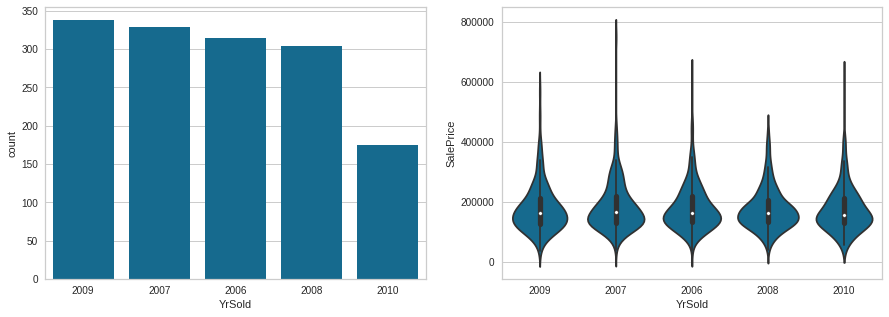

In [48]:
count_and_violin(train_df, "YrSold", "SalePrice")

In [49]:
# mapping some ordinal features in the correct order
# because the OrdinalEncoder uses alphabitical order which is not meaningful
# you could override the default behaviour of the OrdinalEncoder by passing a list of
# categories in the correct order but then you would need to create an encoder for each feature
ordinal_maps = {
    "LandSlope": {'Gtl': 3, 'Mod': 2, 'Sev': 1},
    "ExterQual": {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
    "ExterCond":{'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
    "BsmtQual": {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
    "BsmtCond": {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
    "BsmtExposure": {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0},
    "Functional": {'Typ': 6, 'NA': 6, 'Min1': 5, 'Min2': 4, 'Mod': 3, 'Maj1': 2, 'Maj2': 1, 'Sev': 0}
}

def preprocess_ordered_ordinals(df, maps):
    for key in maps:
        df[key] = df[key].map(maps[key])
        
preprocess_ordered_ordinals(train_df, ordinal_maps)

### Let's create some pipelines
Now we are going to use the lists above to preprocess each feature according to its type.  
We are going to create pipelines for the ease of iteration and model evaluation.


In [50]:
### Importing all needed modules
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split, cross_val_score
from yellowbrick.model_selection import RFECV

In [51]:
# Choosing only the useful features
X = train_df[nominal + ordinal + numerical]
y = train_df["SalePrice"]

In [52]:
nominal_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(sparse=True, handle_unknown="ignore"))
])

ordinal_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OrdinalEncoder())
])

numerical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

basic_preprocessor = ColumnTransformer([
    ("nominal_preprocessor", nominal_pipeline, nominal),
    ("ordinal_preprocessor", ordinal_pipeline, ordinal),
    ("numerical_preprocessor", numerical_pipeline, numerical),
])



X_preprocessed = basic_preprocessor.fit_transform(X)

## Model selection
Now since this is a regression problem with many features, and high linear correlation between those features and the target, we can use linear regression.  
We will also try ensemble learning and see if it gives better results.

In the following cells, you will learn:
- How to train a scikit-learn estimator (model)
- How to evaluate the model using cross validation

**Useful Links**
- [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
- [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)
- [GradientBoostingRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html)
- [cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)

In [53]:
from sklearn.linear_model import LinearRegression
# model definition
model = LinearRegression()
# scores is an array of five elements each element is the scoring on a certain fold
scores = cross_val_score(model, X_preprocessed, y, scoring="neg_root_mean_squared_error", cv=5)
# we are going to use the mean of these scores as an evaluation metric
print(scores.mean())

-33059.1979657031


In [54]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=500)
scores = cross_val_score(model, X_preprocessed, y, scoring="neg_root_mean_squared_error", cv=5)
print(scores.mean())

-28770.865627129457


In [55]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(n_estimators=500)
scores = cross_val_score(model, X_preprocessed, y, scoring="neg_root_mean_squared_error", cv=5)
print(scores.mean())

-25410.439155696087


In [56]:
from xgboost import XGBRegressor

model = XGBRegressor(n_estimators=500)
scores = cross_val_score(model, X_preprocessed, y, scoring="neg_root_mean_squared_error", cv=5)
print(scores.mean())

-28411.736953954452


### Grid search
It look like GradientBoostingRegressor gave the best results. Now let's figure out which parameters we should give to this model to get the best results.  
There are two methods:
- Grid Search
- Random Search
In the first you try the model with all possible combinations of given parameters and choose the best one, the latter doesn't look at all combinations, it only look at random samples which makes it more effecient but less optimal.  
Since we don't care that much about time since the model is fairly small, we are going to use grid search

In [57]:
from sklearn.model_selection import GridSearchCV

## First you need to define the parameter space, or the grid
# it is a simple dictionary where:
# the keys are the names of the parameters given to the estimator
# the values are lists of possible values for each parameter
# the search is going to go as follows
# {"n_estimators": 100, learning_rate: 0.001, max_depth: 3}
# {"n_estimators": 100, learning_rate: 0.001, max_depth: 5}
# {"n_estimators": 100, learning_rate: 0.001, max_depth: 7}
# {"n_estimators": 100, learning_rate: 0.005, max_depth: 3}
# {"n_estimators": 100, learning_rate: 0.005, max_depth: 5}
# {"n_estimators": 100, learning_rate: 0.005, max_depth: 7}
# ........

grid = {
    "n_estimators": range(100, 1000, 100),
    "learning_rate": [0.001, 0.005, 0.01, 0.05, 0.1],
    "max_depth": [3, 5, 7],
}

searcher = GridSearchCV(GradientBoostingRegressor(), grid, scoring="neg_root_mean_squared_error",
                        n_jobs=-1, cv=3, return_train_score=True)

searcher.fit(X_preprocessed, y)



GridSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': range(100, 1000, 100)},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [58]:
# the return_train_score=True paramter allows us to look at the results of the whole process
scores = pd.DataFrame(searcher.cv_results_)
scores

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.704098,0.002685,0.002295,0.000092,0.001,3,100,"{'learning_rate': 0.001, 'max_depth': 3, 'n_es...",-73123.140259,-76920.338926,-72432.433329,-74158.637504,1973.071222,135,-74511.481146,-72403.540809,-74572.444038,-73829.155331,1008.368878
1,1.396959,0.006346,0.003484,0.000183,0.001,3,200,"{'learning_rate': 0.001, 'max_depth': 3, 'n_es...",-68740.180392,-72118.320780,-67480.315128,-69446.272100,1958.179126,132,-69571.776736,-67535.052231,-69536.632243,-68881.153737,951.945633
2,2.161616,0.003010,0.004976,0.000186,0.001,3,300,"{'learning_rate': 0.001, 'max_depth': 3, 'n_es...",-64860.617895,-67933.306430,-63230.791626,-65341.571984,1949.683564,129,-65177.919321,-63163.351764,-65000.432778,-64447.234621,910.729291
3,2.842234,0.036147,0.006362,0.000231,0.001,3,400,"{'learning_rate': 0.001, 'max_depth': 3, 'n_es...",-61385.904370,-64207.566125,-59306.330845,-61633.267113,2008.551395,126,-61253.916150,-59230.930924,-60949.882799,-60478.243291,890.673968
4,3.572480,0.103644,0.011251,0.004568,0.001,3,500,"{'learning_rate': 0.001, 'max_depth': 3, 'n_es...",-58154.477137,-60893.907328,-56079.558419,-58375.980961,1971.680639,123,-57624.088478,-55711.629778,-57264.644862,-56866.787706,829.896503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,8.177733,0.155734,0.014432,0.000038,0.1,7,500,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti...",-25570.397945,-31772.388473,-28721.033736,-28687.940051,2532.060165,58,-29.950023,-172.377526,-29.943667,-77.423739,67.142467
131,9.762194,0.065923,0.021193,0.005928,0.1,7,600,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti...",-25528.144647,-31411.732009,-29515.415075,-28818.430577,2452.004704,62,-11.675347,-170.381149,-11.421246,-64.492580,74.874596
132,11.372998,0.149675,0.019434,0.000236,0.1,7,700,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti...",-25490.649855,-32062.854893,-29358.667289,-28970.724013,2697.078018,70,-4.285613,-170.058034,-4.326617,-59.556754,78.136206
133,12.809200,0.104864,0.022113,0.000135,0.1,7,800,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti...",-25797.414419,-30947.813725,-28522.953300,-28422.727148,2103.835737,57,-1.884120,-170.023973,-1.495679,-57.801257,79.353602


In [59]:
# the best validation score
searcher.best_score_

-24012.540031027984

In [60]:
# the parameters that got the best score
searcher.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 400}

In [61]:
# the trained model that got the best score
model = searcher.best_estimator_

## Predictions
Now that we have a pretty good pipeline and a pretty good model let's submit our predictions

In [62]:
test_df = pd.read_csv("/kaggle/input/home-data-for-ml-course/test.csv")
test_df.drop(columns=["Alley", "PoolQC", "Fence", "MiscFeature", "Utilities", "Street"], inplace=True)

In [63]:
preprocess_ordered_ordinals(test_df, ordinal_maps)

In [64]:
X = test_df[nominal + ordinal + numerical]

In [65]:
X_preprocessed = basic_preprocessor.transform(X)

In [66]:
preds = model.predict(X_preprocessed)

In [68]:
submission = pd.read_csv("/kaggle/input/home-data-for-ml-course/sample_submission.csv")
submission.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [69]:
submission['SalePrice'] = preds
submission.head()

,Id,SalePrice
0,1461,128860.196447
1,1462,163660.260852
2,1463,177716.367405
3,1464,177713.480787
4,1465,182459.267669


In [73]:
submission.to_csv("result.csv", index=False)

In [74]:
pd.read_csv("result.csv").head()

,Id,SalePrice
0,1461,128860.196447
1,1462,163660.260852
2,1463,177716.367405
3,1464,177713.480787
4,1465,182459.267669
